<a href="https://colab.research.google.com/github/shubhtanna/Assignment/blob/main/MLPrac10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings("ignore")

In [ ]:
patient_data = pd.read_csv("/content/heart_statlog_cleveland_hungary_final.csv")

In [ ]:
patient_data.shape

(1190, 12)

In [ ]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
patient_data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
patient_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest pain type'}>],
       [<Axes: title={'center': 'resting bp s'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting blood sugar'}>],
       [<Axes: title={'center': 'resting ecg'}>,
        <Axes: title={'center': 'max heart rate'}>,
        <Axes: title={'center': 'exercise angina'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST slope'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

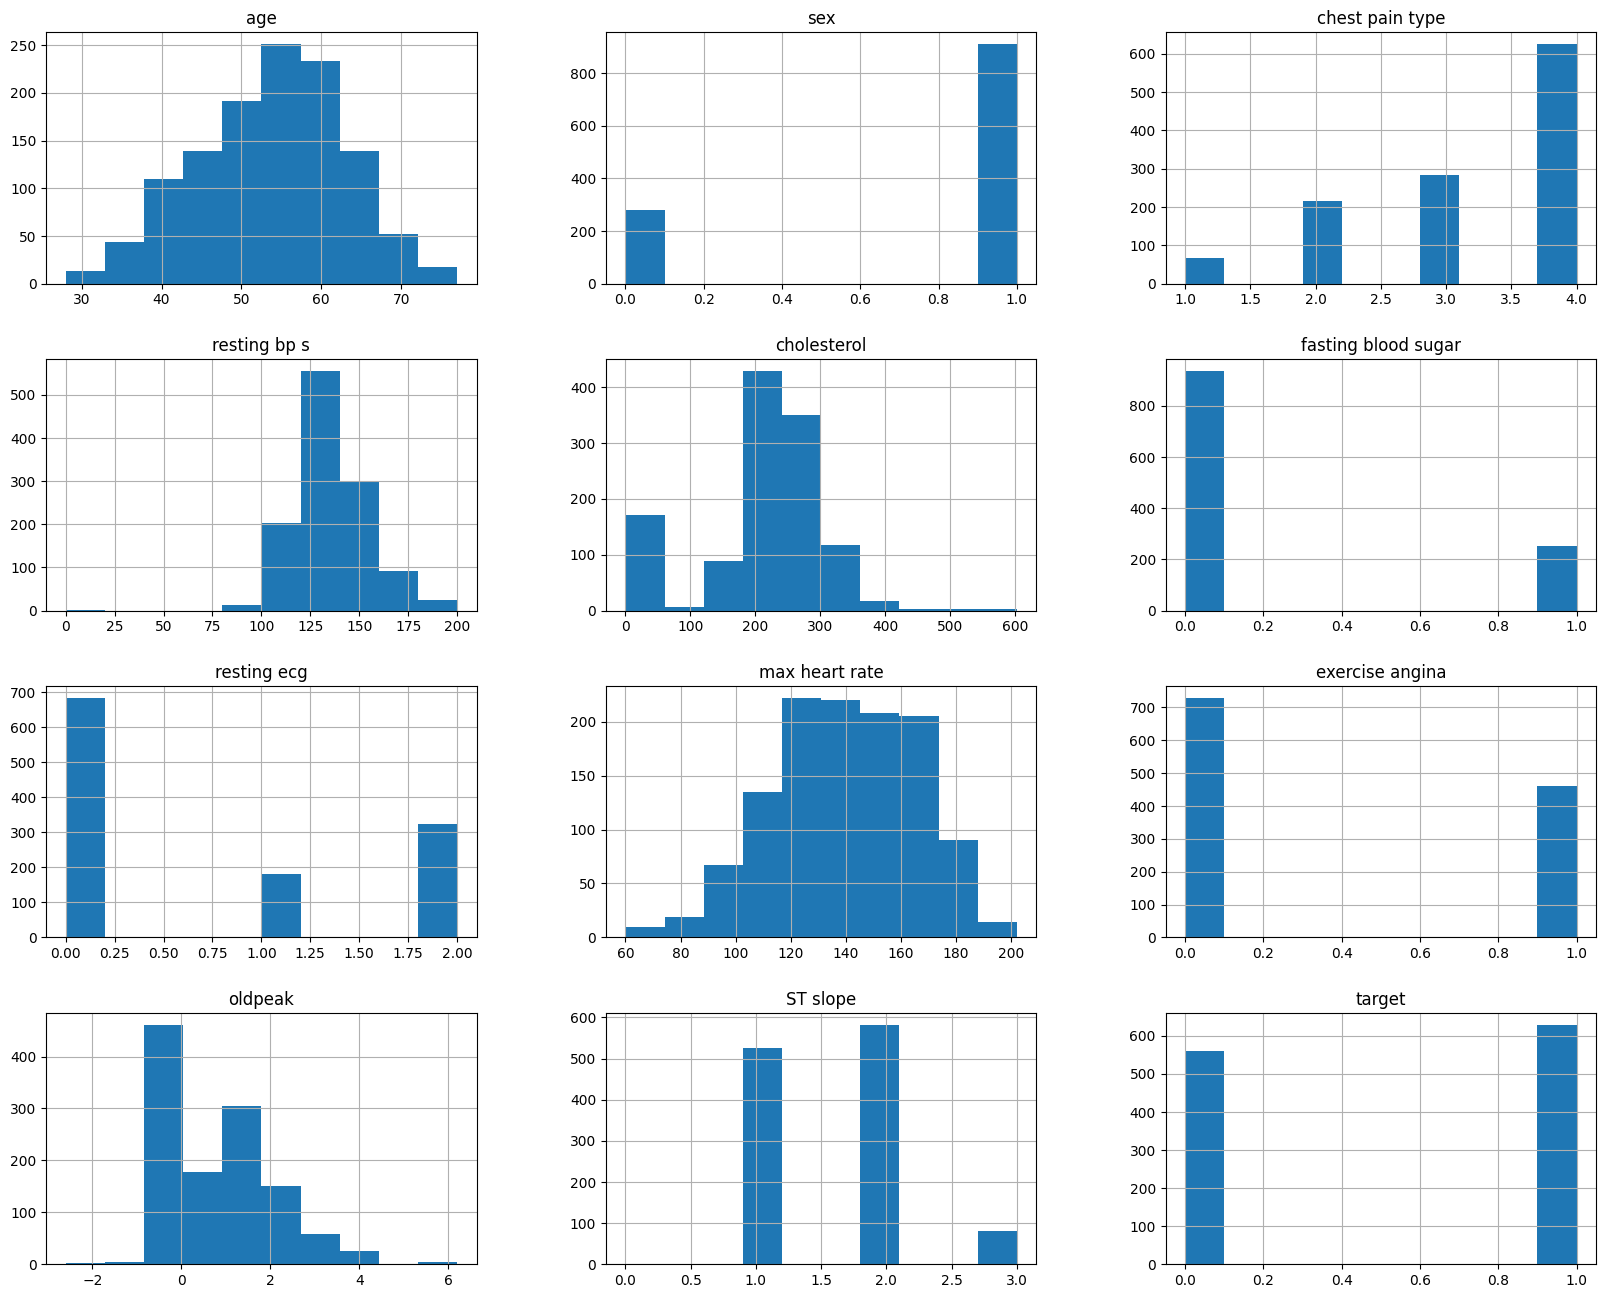

In [ ]:
patient_data.hist(figsize=(20, 16))

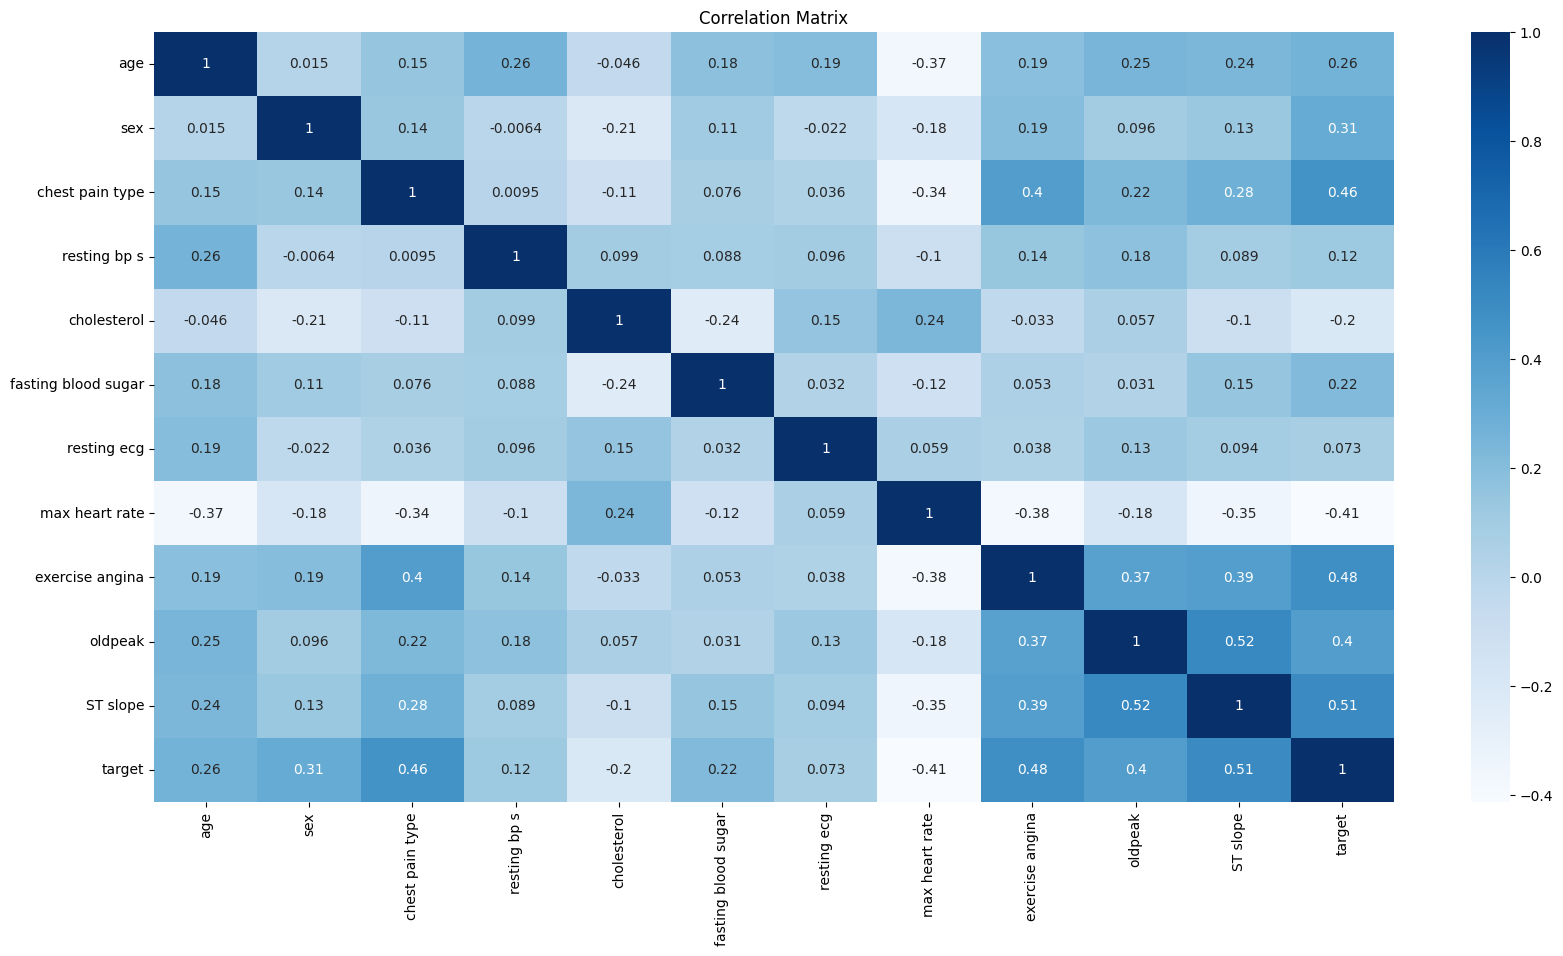

In [ ]:
corr_matrix = patient_data.corr()

plt.figure(figsize = (20, 10))
sns.heatmap(corr_matrix, annot = True, cmap = 'Blues')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
patient_data.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [ ]:
patient_data.duplicated().sum()

272

In [ ]:
patient_data["target"].value_counts()

,count
target,
1,629
0,561


In [ ]:
X_normal = patient_data.drop("target", axis=1)
Y = patient_data["target"]

In [ ]:
Scaler = StandardScaler()
X = Scaler.fit_transform(X_normal)
X = pd.DataFrame(X, columns=X_normal.columns)
X.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,-1.466728,0.555995,-1.318351,0.427328,0.775674,-0.520929,-0.802672,1.265039,-0.795219,-0.849792,-1.023217
1,-0.504600,-1.798576,-0.248932,1.516587,-0.299512,-0.520929,-0.802672,0.637758,-0.795219,0.071119,0.615583
2,-1.787437,0.555995,-1.318351,-0.117301,0.716489,-0.520929,0.346762,-1.636136,-0.795219,-0.849792,-1.023217
3,-0.611503,-1.798576,0.820487,0.318402,0.035867,-0.520929,-0.802672,-1.244085,1.257515,0.531575,0.615583
4,0.029915,0.555995,-0.248932,0.971958,-0.151550,-0.520929,-0.802672,-0.695214,-0.795219,-0.849792,-1.023217


In [ ]:
Y.value_counts()

,count
target,
1,629
0,561


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

**Model Training and Evaluation using different Supervised Learning Algorithms**



**1.**   **Logistic Regression**



Best Hyperparameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy of Logistic Regression model: 85.29%

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       107
           1       0.87      0.86      0.87       131

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238



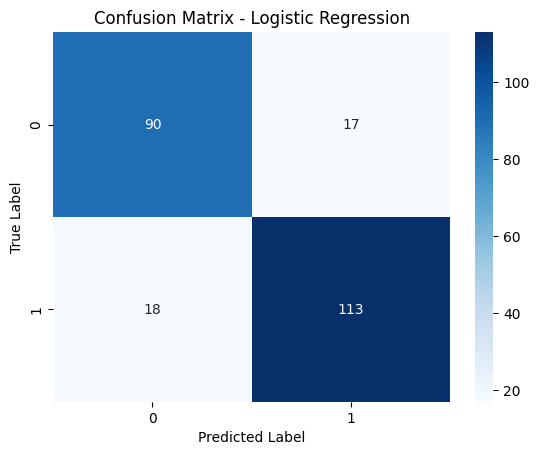

In [ ]:
logreg_param_grid = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-3, 3, 7),
    "solver": ["liblinear"],
}
logreg_model = LogisticRegression(random_state=42)

logreg_grid_search = GridSearchCV(
    logreg_model, logreg_param_grid, cv=5, scoring="accuracy"
)
logreg_grid_search.fit(X_train, Y_train)

best_logreg_params = logreg_grid_search.best_params_
print("Best Hyperparameters for Logistic Regression:", best_logreg_params)

best_logreg_model = LogisticRegression(random_state=42, **best_logreg_params)
best_logreg_model.fit(X_train, Y_train)

logreg_predict = best_logreg_model.predict(X_test)

best_logreg_acc = accuracy_score(Y_test, logreg_predict)
print(
    "Best Accuracy of Logistic Regression model:",
    "{:.2f}%".format(best_logreg_acc * 100),
)
print("\nClassification Report - Logistic Regression:")
lr_cr = classification_report(Y_test, logreg_predict)
print(lr_cr)

logreg_cm = confusion_matrix(Y_test, logreg_predict)

sns.heatmap(logreg_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



**2.   Decision Tree**



Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of Decision Tree with Best Parameters: 86.97%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       107
           1       0.88      0.89      0.88       131

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238



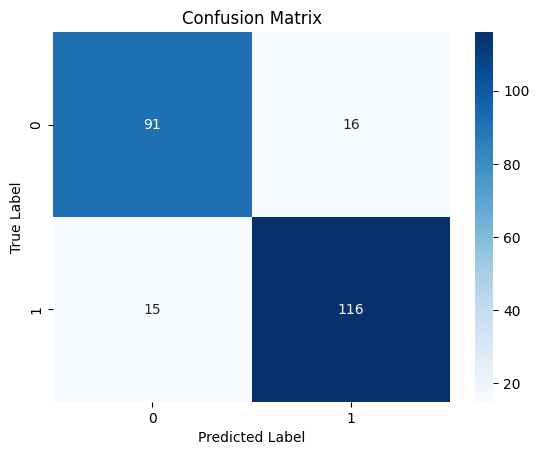

In [ ]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": np.arange(1, 21),
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
}
DT = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(DT, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_DT = DecisionTreeClassifier(random_state=0, **best_params)
best_DT.fit(X_train, Y_train)

DT_predict = best_DT.predict(X_test)

max_dt_acc = accuracy_score(Y_test, DT_predict)
print(
    "Accuracy of Decision Tree with Best Parameters:",
    "{:.2f}%".format(max_dt_acc * 100),
)
print("\nClassification Report:")
dt_cr = classification_report(Y_test, DT_predict)
print(dt_cr)

DT_cm = confusion_matrix(Y_test, DT_predict)

sns.heatmap(DT_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



**3.   KNN**



Best Hyperparameters for K-Nearest Neighbors: {'algorithm': 'auto', 'n_neighbors': 19, 'weights': 'distance'}
Best Accuracy of K-Neighbors Classifier: 94.12%

Classification Report - K-Neighbors Classifier:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       107
           1       0.95      0.94      0.95       131

    accuracy                           0.94       238
   macro avg       0.94      0.94      0.94       238
weighted avg       0.94      0.94      0.94       238



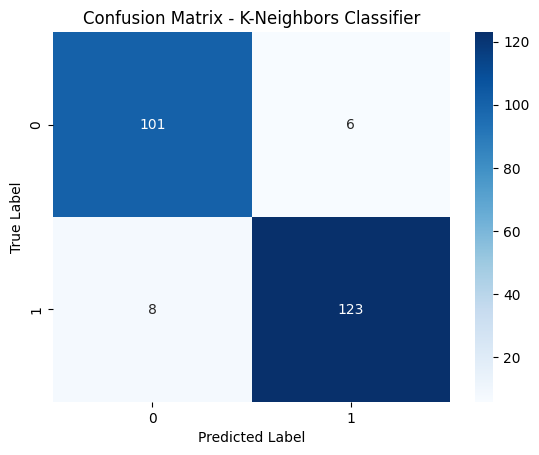

In [ ]:
knn_param_grid = {
    "n_neighbors": np.arange(1, 21),
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
}
KNN = KNeighborsClassifier()

knn_grid_search = GridSearchCV(KNN, knn_param_grid, cv=5, scoring="accuracy")
knn_grid_search.fit(X_train, Y_train)

best_knn_params = knn_grid_search.best_params_
print("Best Hyperparameters for K-Nearest Neighbors:", best_knn_params)

best_KNN_model = KNeighborsClassifier(**best_knn_params)
best_KNN_model.fit(X_train, Y_train)

KNN_predict = best_KNN_model.predict(X_test)

best_KNN_acc = accuracy_score(Y_test, KNN_predict)
print("Best Accuracy of K-Neighbors Classifier:", "{:.2f}%".format(best_KNN_acc * 100))

print("\nClassification Report - K-Neighbors Classifier:")
knn_cr = classification_report(Y_test, KNN_predict)
print(knn_cr)

KNN_cm = confusion_matrix(Y_test, KNN_predict)

sns.heatmap(KNN_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - K-Neighbors Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



**4.   SVM**



Best Hyperparameters for Support Vector Classifier: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Accuracy of Support Vector Classifier: 89.92%

Classification Report - Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       107
           1       0.92      0.89      0.91       131

    accuracy                           0.90       238
   macro avg       0.90      0.90      0.90       238
weighted avg       0.90      0.90      0.90       238



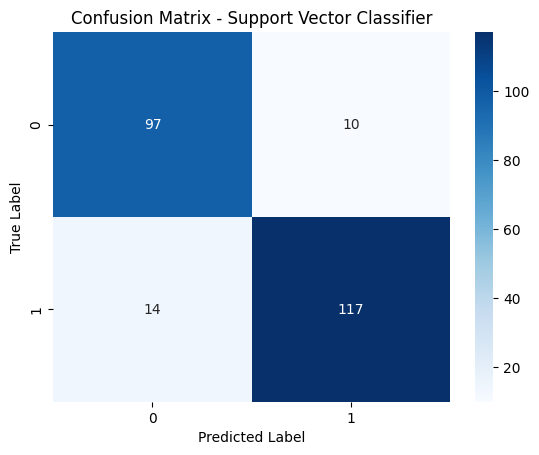

In [ ]:
svm_param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto", 0.001, 0.01, 0.1, 1, 10],
    "kernel": ["rbf"],
}
SVM = SVC()

svm_grid_search = GridSearchCV(SVM, svm_param_grid, cv=5, scoring="accuracy")
svm_grid_search.fit(X_train, Y_train)

best_svm_params = svm_grid_search.best_params_
print("Best Hyperparameters for Support Vector Classifier:", best_svm_params)

best_SVM_model = SVC(**best_svm_params)
best_SVM_model.fit(X_train, Y_train)

SVM_predict = best_SVM_model.predict(X_test)

best_SVM_acc = accuracy_score(Y_test, SVM_predict)
print(
    "Best Accuracy of Support Vector Classifier:", "{:.2f}%".format(best_SVM_acc * 100)
)
print("\nClassification Report - Support Vector Classifier:")
svm_cr = classification_report(Y_test, SVM_predict)
print(svm_cr)

SVM_cm = confusion_matrix(Y_test, SVM_predict)

sns.heatmap(SVM_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Support Vector Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



**5.   Naive Bayes**



Accuracy of Naive Bayes model: 85.71%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.86      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.85      0.86       238
weighted avg       0.86      0.86      0.86       238



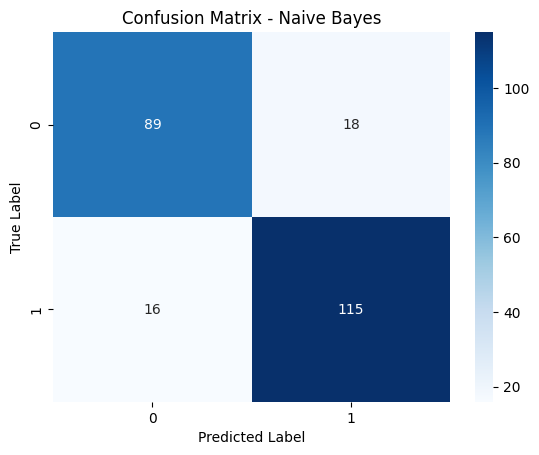

In [ ]:
NB = GaussianNB()

NB.fit(X_train, Y_train)

NB_predict = NB.predict(X_test)

NB_acc_score = accuracy_score(Y_test, NB_predict)

print("Accuracy of Naive Bayes model:", "{:.2f}%".format(NB_acc_score * 100))

print("\nClassification Report:")
nb_cr = classification_report(Y_test, NB_predict)
print(nb_cr)

NB_cm = confusion_matrix(Y_test, NB_predict)

sns.heatmap(NB_cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

**COMPARISION**



**1.   Comparision Table**



In [ ]:
models_accuracy = {
    "Logistic Regression": best_logreg_acc,
    "Decision Tree": max_dt_acc,
    "KNN": best_KNN_acc,
    "SVM": best_SVM_acc,
    "Naive Bayes": NB_acc_score,
}

best_model = max(models_accuracy, key=models_accuracy.get)
best_accuracy = models_accuracy[best_model]

comparison = pd.DataFrame(
    {
        "Model": list(models_accuracy.keys()),
        "Accuracy": ["{:.2f}%".format(acc * 100) for acc in models_accuracy.values()],
    }
)

print("Comparison Table:")
print(comparison)

print("\nBest Model:")
print(f"{best_model}: {best_accuracy:.2%}")

Comparison Table:
                 Model Accuracy
0  Logistic Regression   85.29%
1        Decision Tree   86.97%
2                  KNN   94.12%
3                  SVM   89.92%
4          Naive Bayes   85.71%

Best Model:
KNN: 94.12%




**2.   Comparision using Bar Plot**



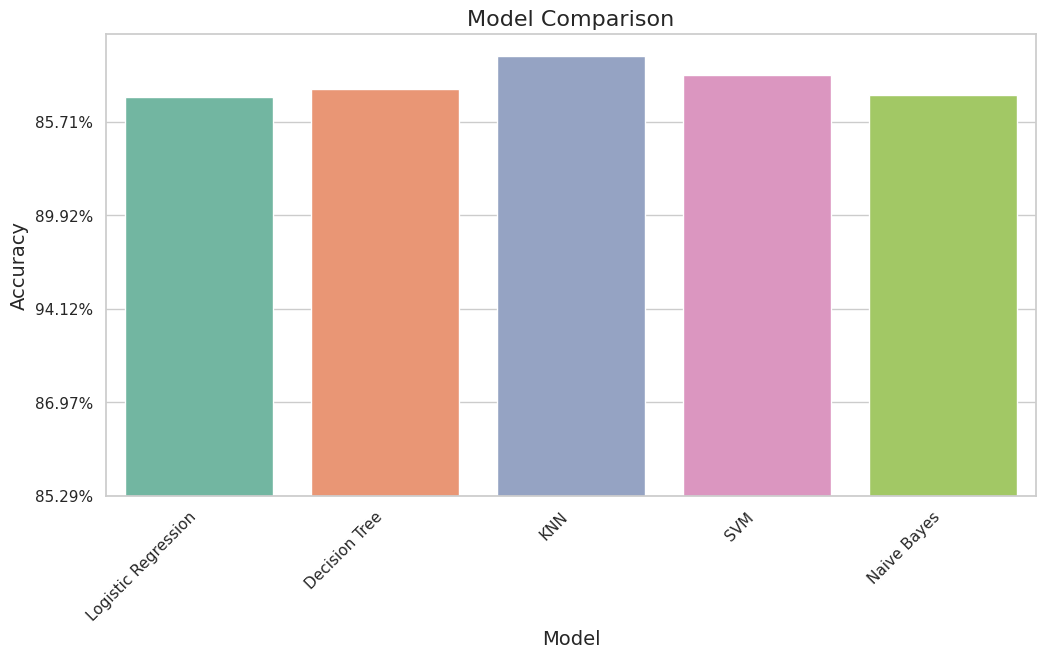

In [ ]:
y_values = [value * 100 for value in models_accuracy.values()]
y_labels = ["{:.2f}%".format(value) for value in y_values]

colors = sns.color_palette("Set2", len(models_accuracy))

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=list(models_accuracy.keys()), y=y_values, palette=colors)

ax.set_yticklabels(y_labels)

plt.xticks(rotation=45, ha="right")

plt.title("Model Comparison", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

plt.show()



**3.   Comparing Confusion Matrices**



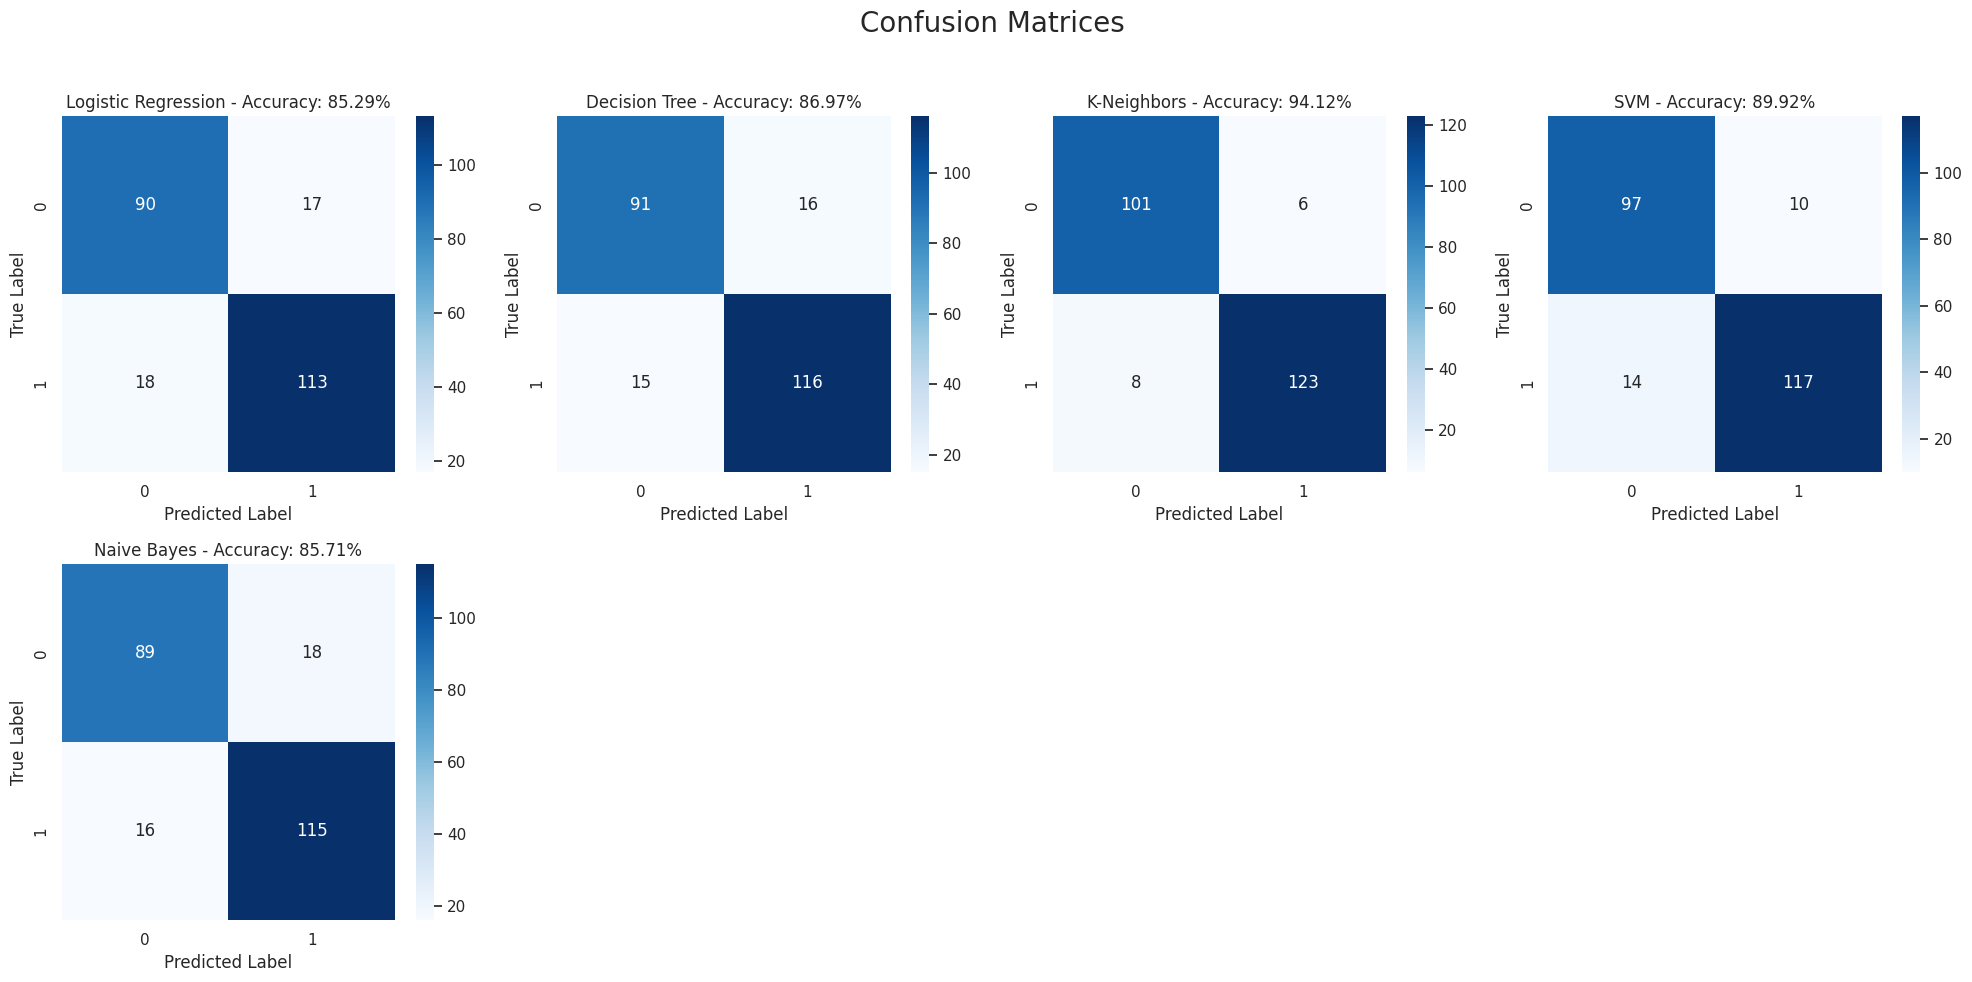

In [ ]:
num_classifiers = 5
num_rows = (num_classifiers - 1) // 4 + 1
num_cols = min(num_classifiers, 4)

fig, axes = plt.subplots(
    nrows=num_rows, ncols=num_cols, figsize=(5 * num_cols, 5 * num_rows)
)
fig.suptitle("Confusion Matrices", fontsize=20)

classifiers = [
    ("Logistic Regression", logreg_cm, best_logreg_acc),
    ("Decision Tree", DT_cm, max_dt_acc),
    ("K-Neighbors", KNN_cm, best_KNN_acc),
    ("SVM", SVM_cm, best_SVM_acc),
    ("Naive Bayes", NB_cm, NB_acc_score),
]

for (name, cm, acc_score), ax in zip(classifiers, axes.flatten()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)

    ax.set_title(f"{name} - Accuracy: {acc_score * 100:.2f}%")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

for i in range(num_classifiers, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



**4.   Classification Report Comparision Bar Plots**

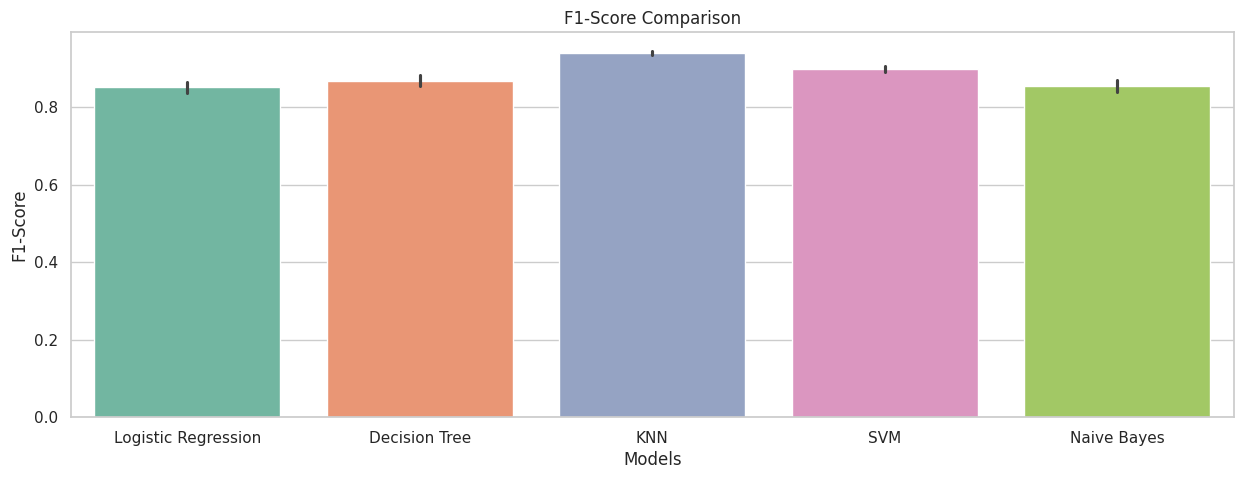

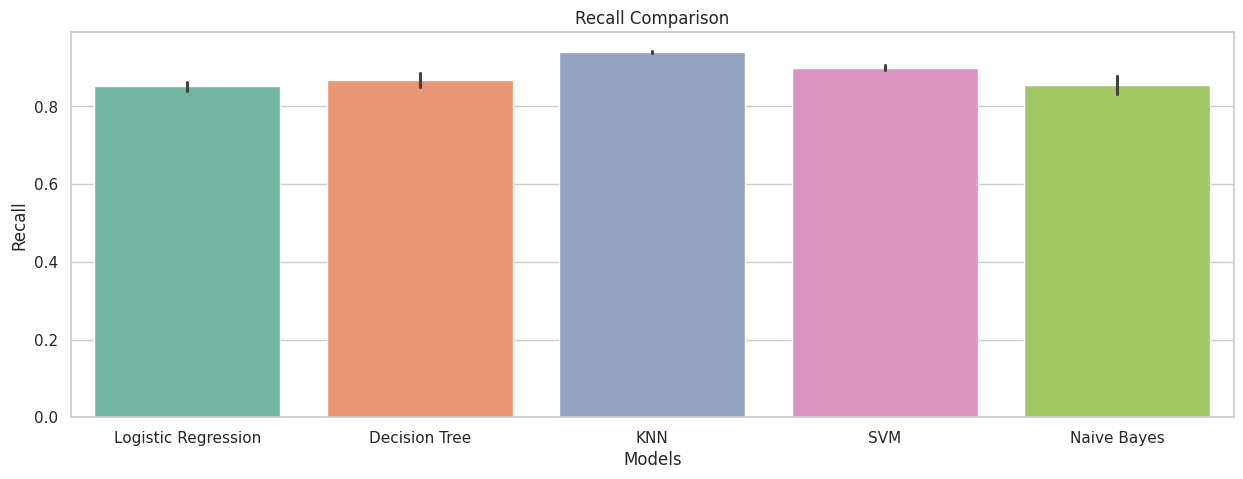

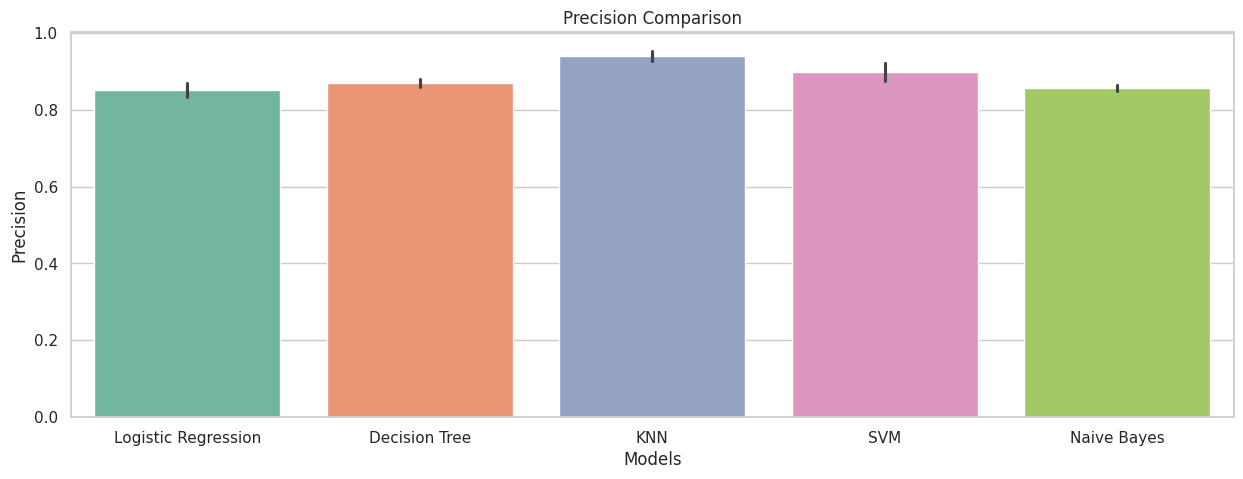

In [ ]:
lr_cr = classification_report(Y_test, logreg_predict, output_dict=True)
dt_cr = classification_report(Y_test, DT_predict, output_dict=True)
knn_cr = classification_report(Y_test, KNN_predict, output_dict=True)
svm_cr = classification_report(Y_test, SVM_predict, output_dict=True)
nb_cr = classification_report(Y_test, NB_predict, output_dict=True)

classification_reports = [lr_cr, dt_cr, knn_cr, svm_cr, nb_cr]

f1_scores = {}
recall_scores = {}
precision_scores = {}

for name, cr in zip(
    [
        "Logistic Regression",
        "Decision Tree",
        "KNN",
        "SVM",
        "Naive Bayes",
    ],
    classification_reports,
):
    f1_scores[name] = [
        cr[label]["f1-score"] for label in cr.keys() if label.isnumeric()
    ]
    recall_scores[name] = [
        cr[label]["recall"] for label in cr.keys() if label.isnumeric()
    ]
    precision_scores[name] = [
        cr[label]["precision"] for label in cr.keys() if label.isnumeric()
    ]

df_f1 = pd.DataFrame(
    f1_scores, index=[str(i) for i in range(1, len(f1_scores["Decision Tree"]) + 1)]
)
df_recall = pd.DataFrame(
    recall_scores,
    index=[str(i) for i in range(1, len(recall_scores["Decision Tree"]) + 1)],
)
df_precision = pd.DataFrame(
    precision_scores,
    index=[str(i) for i in range(1, len(precision_scores["Decision Tree"]) + 1)],
)

plt.figure(figsize=(15, 5))
sns.barplot(data=df_f1, palette="Set2")
plt.title("F1-Score Comparison")
plt.xlabel("Models")
plt.ylabel("F1-Score")
plt.show()

plt.figure(figsize=(15, 5))
sns.barplot(data=df_recall, palette="Set2")
plt.title("Recall Comparison")
plt.xlabel("Models")
plt.ylabel("Recall")
plt.show()

plt.figure(figsize=(15, 5))
sns.barplot(data=df_precision, palette="Set2")
plt.title("Precision Comparison")
plt.xlabel("Models")
plt.ylabel("Precision")
plt.show()